In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
khaledhellmy_brain_breast_tumor_path = kagglehub.dataset_download('khaledhellmy/brain-breast-tumor')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test/no598.jpg
/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test/no543.jpg
/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test/no525.jpg
/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test/no596.jpg
/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test/no594.jpg
/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test/no583.jpg
/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test/no544.jpg
/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test/no538.jpg
/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test/no554.jpg
/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test/no578.jpg
/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test/no584.jpg
/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test/no531.jpg
/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test/no553.jpg

In [ ]:
import pandas as pd
import os

base_paths = [
    ("/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Train", "No tumor", "Train"),
    ("/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test", "No tumor", "Test"),
    ("/kaggle/input/brain-breast-tumor/Dataset/Brain scans/Tumor/TRAIN", "Tumor", "Train"),
    ("/kaggle/input/brain-breast-tumor/Dataset/Brain scans/Tumor/TEST", "Tumor", "Test")
]

def collect_image_data():
    image_paths = []
    labels = []
    splits = []
    for path, label, split in base_paths:
        if not os.path.exists(path):
            print(f"Warning: Directory {path} does not exist.")
            continue
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            if os.path.isfile(img_path) and img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(img_path)
                labels.append(label)
                splits.append(split)
    return image_paths, labels, splits

image_paths, labels, splits = collect_image_data()

df = pd.DataFrame({
    'Image_Path': image_paths,
    'Label': labels,
    'Split': splits
})

In [ ]:
import pandas as pd
import os

base_paths = [
    ("/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Train", "No tumor", "Train"),
    ("/kaggle/input/brain-breast-tumor/Dataset/Brain scans/No tumor/Test", "No tumor", "Test"),
    ("/kaggle/input/brain-breast-tumor/Dataset/Brain scans/Tumor/TRAIN", "Tumor", "Train"),
    ("/kaggle/input/brain-breast-tumor/Dataset/Brain scans/Tumor/TEST", "Tumor", "Test"),
    ("/kaggle/input/brain-breast-tumor/Dataset/Breast scans/benign/Train", "benign", "Train"),
    ("/kaggle/input/brain-breast-tumor/Dataset/Breast scans/benign/Test", "benign", "Test"),
    ("/kaggle/input/brain-breast-tumor/Dataset/Breast scans/malignant/Train", "malignant", "Train"),
    ("/kaggle/input/brain-breast-tumor/Dataset/Breast scans/malignant/Test", "malignant", "Test"),
    ("/kaggle/input/brain-breast-tumor/Dataset/Breast scans/normal/Train", "normal", "Train"),
    ("/kaggle/input/brain-breast-tumor/Dataset/Breast scans/normal/Test", "normal", "Test")
]

def collect_image_data():
    image_paths = []
    labels = []
    splits = []
    for path, label, split in base_paths:
        if not os.path.exists(path):
            print(f"Warning: Directory {path} does not exist.")
            continue
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            if os.path.isfile(img_path) and img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(img_path)
                labels.append(label)
                splits.append(split)
    return image_paths, labels, splits

image_paths, labels, splits = collect_image_data()

df = pd.DataFrame({
    'Image_Path': image_paths,
    'Label': labels,
    'Split': splits
})

In [ ]:
df

,Image_Path,Label,Split
0,/kaggle/input/brain-breast-tumor/Dataset/Brain...,No tumor,Train
1,/kaggle/input/brain-breast-tumor/Dataset/Brain...,No tumor,Train
2,/kaggle/input/brain-breast-tumor/Dataset/Brain...,No tumor,Train
3,/kaggle/input/brain-breast-tumor/Dataset/Brain...,No tumor,Train
4,/kaggle/input/brain-breast-tumor/Dataset/Brain...,No tumor,Train
...,...,...,...
2640,/kaggle/input/brain-breast-tumor/Dataset/Breas...,normal,Test
2641,/kaggle/input/brain-breast-tumor/Dataset/Breas...,normal,Test
2642,/kaggle/input/brain-breast-tumor/Dataset/Breas...,normal,Test
2643,/kaggle/input/brain-breast-tumor/Dataset/Breas...,normal,Test


In [ ]:
df = df[['Image_Path', 'Label']]

In [ ]:
df

,Image_Path,Label
0,/kaggle/input/brain-breast-tumor/Dataset/Brain...,No tumor
1,/kaggle/input/brain-breast-tumor/Dataset/Brain...,No tumor
2,/kaggle/input/brain-breast-tumor/Dataset/Brain...,No tumor
3,/kaggle/input/brain-breast-tumor/Dataset/Brain...,No tumor
4,/kaggle/input/brain-breast-tumor/Dataset/Brain...,No tumor
...,...,...
2640,/kaggle/input/brain-breast-tumor/Dataset/Breas...,normal
2641,/kaggle/input/brain-breast-tumor/Dataset/Breas...,normal
2642,/kaggle/input/brain-breast-tumor/Dataset/Breas...,normal
2643,/kaggle/input/brain-breast-tumor/Dataset/Breas...,normal


In [ ]:
df.shape

(2645, 2)

In [ ]:
df.columns

Index(['Image_Path', 'Label'], dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Image_Path,0
Label,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  2645 non-null   object
 1   Label       2645 non-null   object
dtypes: object(2)
memory usage: 41.5+ KB


In [ ]:
df['Label'].unique()

array(['No tumor', 'Tumor', 'benign', 'malignant', 'normal'], dtype=object)

In [ ]:
df['Label'].value_counts()

,count
Label,
benign,891
No tumor,601
Tumor,600
malignant,420
normal,133


/tmp/ipython-input-32-2624861623.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Label", palette="viridis", ax=ax)


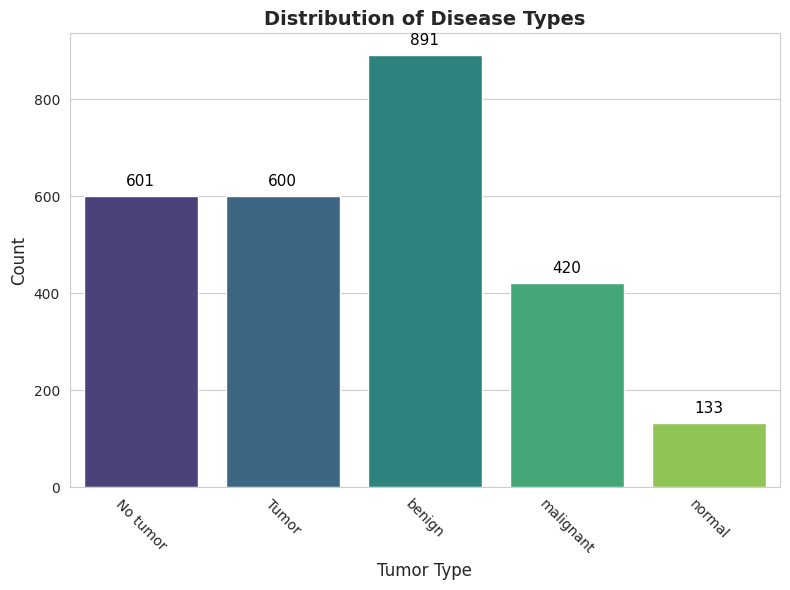

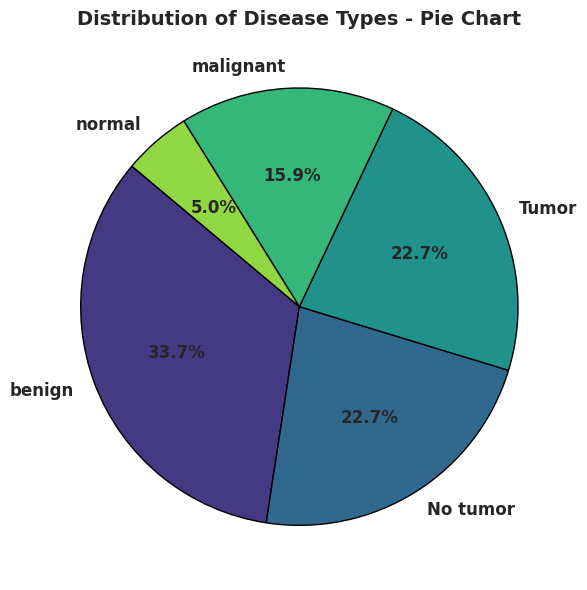

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="Label", palette="viridis", ax=ax)
ax.set_title("Distribution of Disease Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=-45)
plt.tight_layout()
plt.show()

label_counts = df["Label"].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
       startangle=140, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax.set_title("Distribution of Disease Types - Pie Chart", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

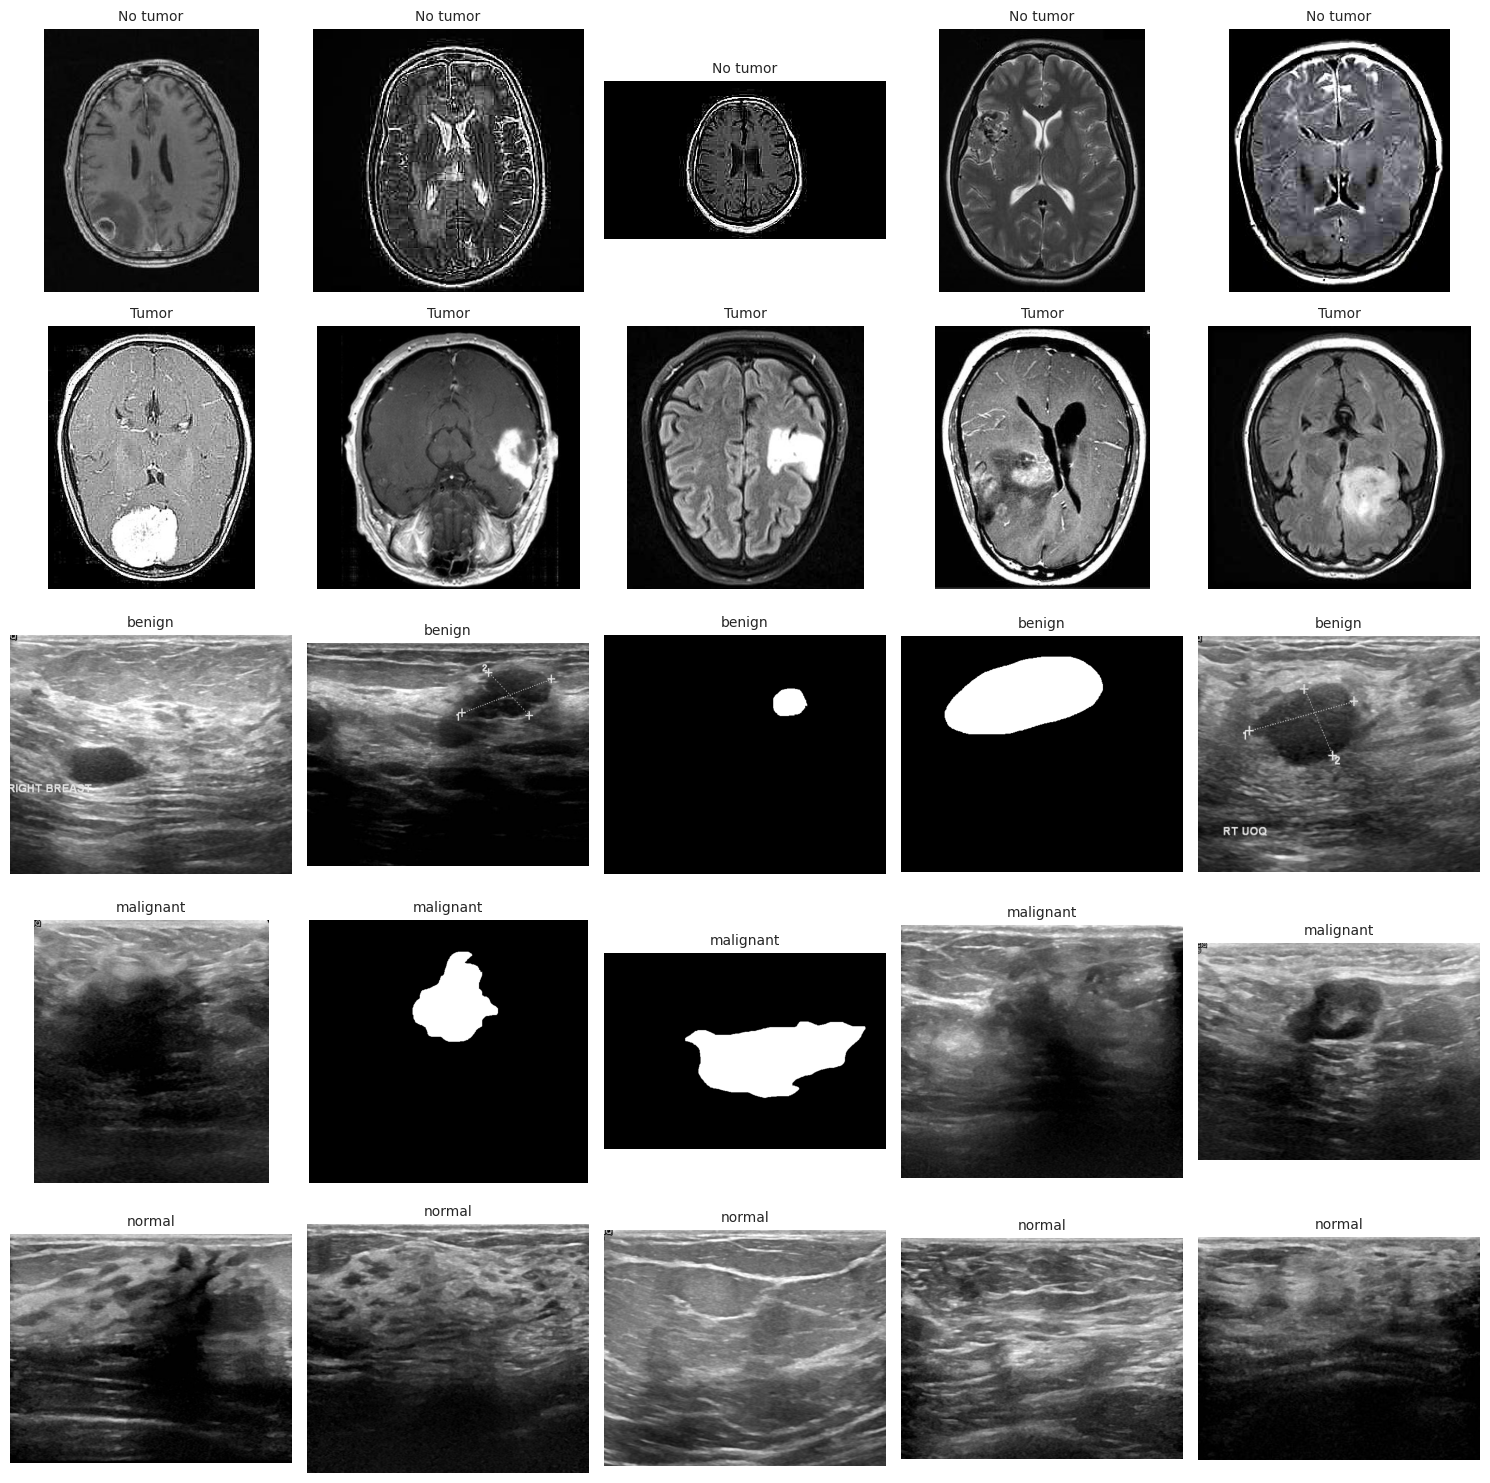

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

categories = df['Label'].unique()

n_cols = 5
n_rows = len(categories)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
if n_rows == 1:
    axes = [axes]
else:
    axes = axes.flatten()

plot_idx = 0

for category in categories:
    category_paths = df[df['Label'] == category]['Image_Path'].head(5).tolist()

    for img_path in category_paths:
        if plot_idx < len(axes):
            try:
                img = cv2.imread(img_path)
                if img is None:
                    axes[plot_idx].text(0.5, 0.5, 'Image not found',
                                        ha='center', va='center', transform=axes[plot_idx].transAxes)
                else:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    axes[plot_idx].imshow(img)
                axes[plot_idx].set_title(category, fontsize=10)
                axes[plot_idx].axis('off')
            except:
                axes[plot_idx].text(0.5, 0.5, 'Error loading',
                                    ha='center', va='center', transform=axes[plot_idx].transAxes)
            plot_idx += 1

    while len(category_paths) < 5 and plot_idx < len(axes):
        axes[plot_idx].text(0.5, 0.5, 'No image',
                            ha='center', va='center', transform=axes[plot_idx].transAxes)
        axes[plot_idx].set_title(category, fontsize=10)
        axes[plot_idx].axis('off')
        plot_idx += 1

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.utils import resample

categories = df['Label'].unique()

max_count = df['Label'].value_counts().max()

df_balanced = pd.DataFrame()

for category in categories:
    df_category = df[df['Label'] == category]
    df_category_resampled = resample(df_category,
                                    replace=True,
                                    n_samples=max_count,
                                    random_state=42)
    df_balanced = pd.concat([df_balanced, df_category_resampled], ignore_index=True)

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['Label'].value_counts())

df = df_balanced

Label
malignant    891
No tumor     891
Tumor        891
normal       891
benign       891
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

class TrigConv2D(Layer):
    def __init__(self, filters, kernel_size, frequency=1.0, **kwargs):
        super(TrigConv2D, self).__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.frequency = frequency

    def build(self, input_shape):
        kernel_shape = (self.kernel_size, self.kernel_size, input_shape[-1], self.filters)
        kernels = []
        for i in range(self.filters):
            x = np.linspace(-1, 1, self.kernel_size)
            y = np.linspace(-1, 1, self.kernel_size)
            x_grid, y_grid = np.meshgrid(x, y)
            if i % 2 == 0:
                kernel = np.sin(self.frequency * (x_grid + y_grid))
            else:
                kernel = np.cos(self.frequency * (x_grid + y_grid))
            kernel = kernel[:, :, np.newaxis, np.newaxis]
            kernel = np.repeat(kernel, input_shape[-1], axis=2)
            kernel = np.repeat(kernel, 1, axis=3)
            kernels.append(kernel)
        self.kernel = tf.constant(np.concatenate(kernels, axis=3), dtype=tf.float32)
        super(TrigConv2D, self).build(input_shape)

    def call(self, inputs):
        return tf.nn.conv2d(inputs, self.kernel, strides=[1, 1, 1, 1], padding='SAME')

def load_and_preprocess_image(image_path, target_size=(128, 128)):
    img = cv2.imread(image_path)
    if img is None:
        return np.zeros((*target_size, 3))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

image_size = (128, 128)
X = np.array([load_and_preprocess_image(path, image_size) for path in df['Image_Path']])
y = pd.get_dummies(df['Label']).values
label_names = pd.get_dummies(df['Label']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

inputs = Input(shape=(image_size[0], image_size[1], 3))
x = TrigConv2D(filters=16, kernel_size=3, frequency=2.0)(inputs)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(len(label_names), activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.5102 - loss: 2.5869 - val_accuracy: 0.7811 - val_loss: 0.4803
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8744 - loss: 0.3285 - val_accuracy: 0.9068 - val_loss: 0.2703
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9769 - loss: 0.1106 - val_accuracy: 0.9304 - val_loss: 0.2154
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9947 - loss: 0.0383 - val_accuracy: 0.9473 - val_loss: 0.1736
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9941 - loss: 0.0344 - val_accuracy: 0.9484 - val_loss: 0.1713
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9951 - loss: 0.0170 - val_accuracy: 0.9551 - val_loss: 0.1702
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9999 - loss: 0.0039 - val_accuracy: 0.9517 - val_loss: 0.1894
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9989 - loss: 0.0052 - val_accuracy

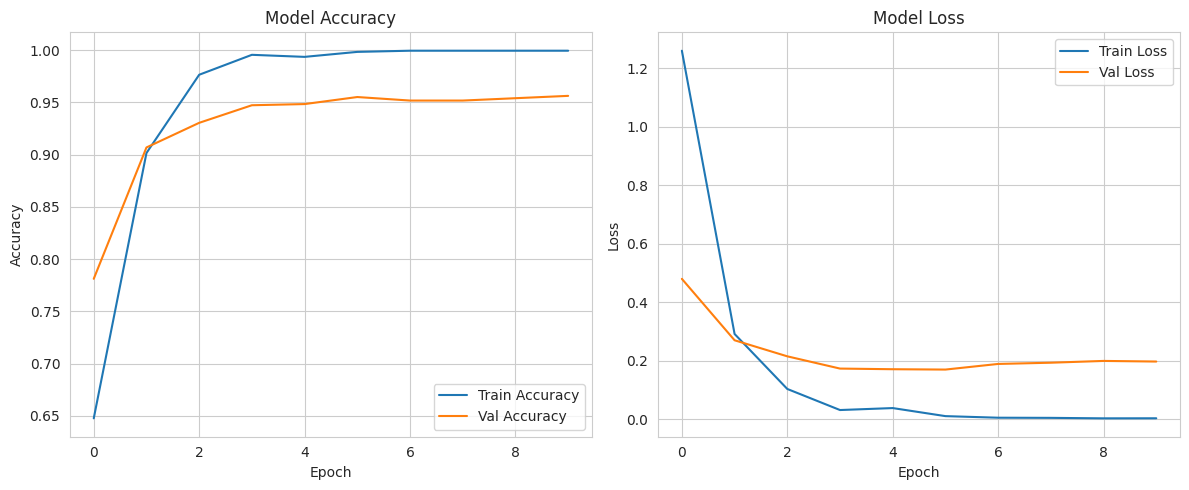

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


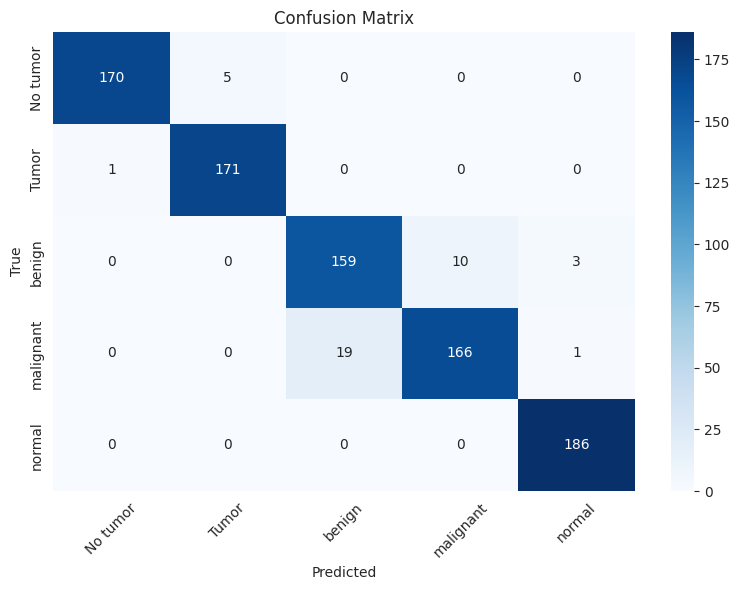


Classification Report:
              precision    recall  f1-score   support

    No tumor       0.99      0.97      0.98       175
       Tumor       0.97      0.99      0.98       172
      benign       0.89      0.92      0.91       172
   malignant       0.94      0.89      0.92       186
      normal       0.98      1.00      0.99       186

    accuracy                           0.96       891
   macro avg       0.96      0.96      0.96       891
weighted avg       0.96      0.96      0.96       891



In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Val Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
plt.tight_layout()
plt.show()

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=label_names))